#### Import Libraries yang diperukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Persiapkan Data

In [ ]:
df = pd.read_csv('../Data/AppleStore.csv')

In [ ]:
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# Problem Solving

#### Problem 1 : Mencari tahu jenis / genre aplikasi yang terjual paling sukses

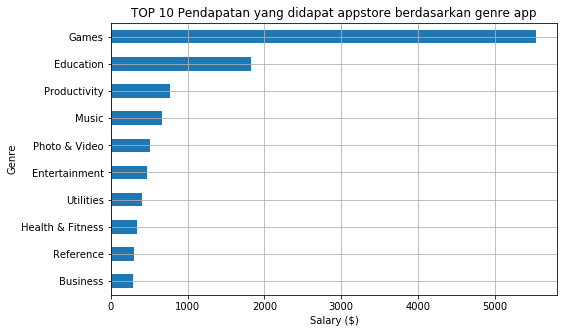

In [ ]:
plt.figure(figsize=(8,5))
df.groupby('prime_genre').sum()['price'].sort_values().tail(10).plot.barh()
plt.title('TOP 10 Pendapatan yang didapat appstore berdasarkan genre app')
plt.xlabel('Salary ($)')
plt.ylabel('Genre')
plt.grid()
plt.savefig('../Output/Pendapatan x genre.png')
plt.show()

#### Problem 2 : Mencari tahu jenis / genre aplikasi yang memiliki rating tertinggi

In [ ]:
genres = df['prime_genre'].unique()

In [ ]:
genres

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [ ]:
genre_rating = lambda genre : df['user_rating'][df['prime_genre'] == genre].sum() / len(df['user_rating'][df['prime_genre'] == genre])
df_genre_rating = pd.Series([genre_rating(genre) for genre in genres ],genres,dtype=np.float64)

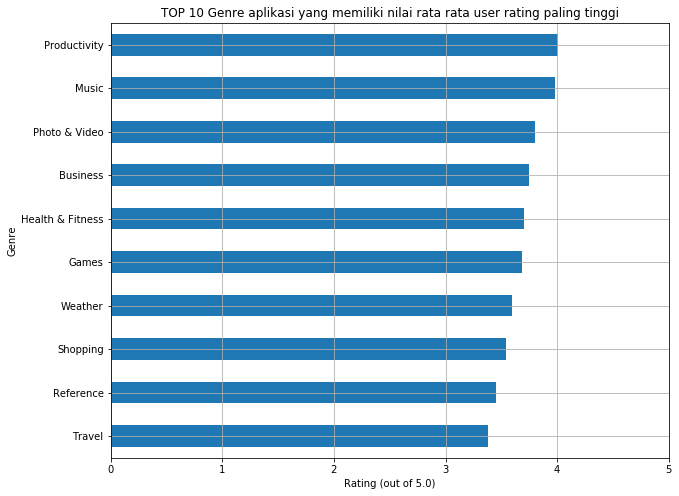

In [ ]:
plt.figure(figsize=(10,8))
df_genre_rating.sort_values().tail(10).plot.barh()
plt.xticks([i for i in range(0,6)])
plt.title('TOP 10 Genre aplikasi yang memiliki nilai rata rata user rating paling tinggi')
plt.ylabel('Genre')
plt.xlabel('Rating (out of 5.0)')
plt.grid()
plt.savefig('../Output/User rating x genre.png')
plt.show()

#### Problem 3 : Menememukan rata rata genre aplikasi yang paling mahal

In [ ]:
genre_filter = lambda genre : df['price'][df['prime_genre'] == genre].sum() / len(df['price'][df['prime_genre'] == genre])

In [ ]:
df_genre_price = pd.Series([genre_filter(genre) for genre in genres],genres,np.float64)

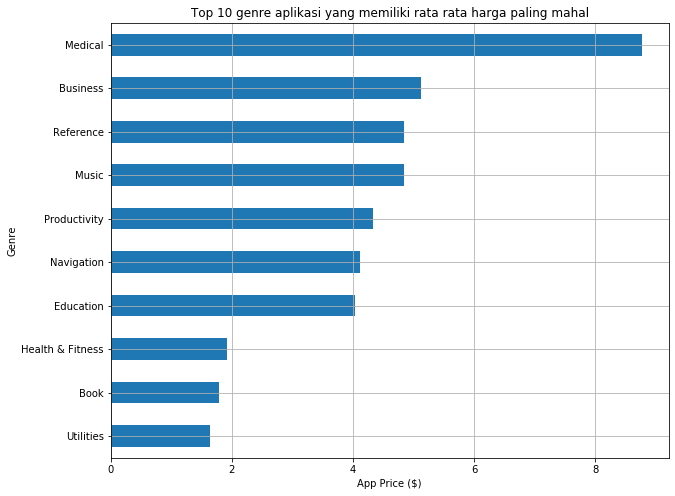

In [ ]:
plt.figure(figsize=(10,8))
df_genre_price.sort_values().tail(10).plot.barh()
plt.title('Top 10 genre aplikasi yang memiliki rata rata harga paling mahal')
plt.ylabel('Genre')
plt.xlabel('App Price ($)')
plt.grid()
plt.savefig('../Output/Harga app x genre.png')
plt.show()

#### Problem 4 : Mengetahui aplikasi yang terjual paling worldwide dari jumlah jenis bahasa pengguna

In [ ]:
df_worldwide = df.sort_values(by='lang.num',ascending=False).head(10)[['track_name','price','user_rating','ver','cont_rating','lang.num']]

In [ ]:
kolom_lama = ['track_name','price','user_rating','ver','cont_rating','lang.num']
kolom_baru = ['Nama App','Harga ($)','Rating Pengguna','Versi','Konten Rating','Jumlah Bahasa']
df_worldwide.rename(columns={lama:baru for lama,baru in zip(kolom_lama,kolom_baru)},inplace=True)

In [ ]:
def format_harga(harga):
    if np.float64(harga) == np.float64(0):
        return "Gratis"
    else:
        return f"${harga}"

In [ ]:
df_worldwide['Harga ($)'] = df_worldwide['Harga ($)'].apply(format_harga)

In [ ]:
df_worldwide

,Nama App,Harga ($),Rating Pengguna,Versi,Konten Rating,Jumlah Bahasa
3414,Google Photos - unlimited photo and video storage,Gratis,5.0,2.17.0,4+,75
5780,Google Duo - simple video calling,Gratis,4.0,12.0,4+,74
2676,Google Slides,Gratis,4.0,1.2017.20204,4+,69
2550,Google Docs,Gratis,4.5,1.2017.20203,4+,69
2551,Google Sheets,Gratis,4.5,1.2017.20204,4+,69
5777,Google Allo — smart messaging,Gratis,3.5,11.0,17+,68
2863,Inbox by Gmail,Gratis,4.5,1.3.170423,4+,63
681,Google Translate,Gratis,3.5,5.10.0,4+,59
6392,Space by Tinybop,$2.99,4.5,1.0.3,4+,58
3141,The Robot Factory by Tinybop,Gratis,4.0,1.1.6,4+,58
